# Quantum Chemistry (on my own)

In [8]:
from src.hartree_fock_library import HartreeFock,HartreeFockVariational
from src.hamiltonian_utils import get_twobody_nuclearshell_model,FermiHubbardHamiltonian,SingleParticleState
import numpy as np
import torch
from typing import Dict,List
from src.qml_models import AdaptVQEFermiHubbard
from src.qml_utils.train import Fit
from src.qml_utils.utils import configuration
import matplotlib.pyplot as plt
from tqdm import tqdm


In [18]:
class SpinConservation():
    
    def __init__(self,size:int):
        
        self.size=size

    def spin_conservation(self,idxs:List):

        l=len(idxs)

        total_initial_spin=0.
        for idx in idxs[:l//2]:
            
            if idx < self.size:
                total_initial_spin+=1
                
        total_final_spin=0.
        for idx in idxs[l//2:]:
            
            if idx < self.size:
                total_final_spin+=1
        return total_initial_spin==total_final_spin
    
    def local_interaction(self,idxs:List):

        condition= idxs[0]==idxs[-2] and idxs[1]==idxs[-1]
        
        return condition

In [19]:
size_a=9
size_b=9
FHHamiltonian=FermiHubbardHamiltonian(size_a=size_a,size_b=size_a,nparticles_a=2,nparticles_b=2)

u=4.
t=1.
v_ext=np.zeros(size_a)

# define the local onsite potential
twobody_matrix:Dict={}
for i in range(size_a):
    twobody_matrix[(i,i+size_a,i+size_a,i)]=u
    twobody_matrix[(i, i + size_a, i, i + size_a)] = -u
    twobody_matrix[( i + size_a,i , i + size_a,i)] = -u
    twobody_matrix[(i+size_a, i , i , i+size_a)] = u

print(twobody_matrix)
kinetic_term:Dict={}
adj_matrix=np.zeros((size_a+size_b,size_a+size_b))
linear_dimension=int(np.sqrt(size_a))
for i in range(linear_dimension):
        for j in range(linear_dimension):
            
            kinetic_term[(i+j*linear_dimension,(i+1) % linear_dimension + linear_dimension*((j) % linear_dimension))]=t
            kinetic_term[(i+j*linear_dimension,(i) % linear_dimension + linear_dimension*((j+1) % linear_dimension))]=t
            
            kinetic_term[((i+1) % linear_dimension + linear_dimension*((j) % linear_dimension),i+j*linear_dimension)]=t
            kinetic_term[((i) % linear_dimension + linear_dimension*((j+1) % linear_dimension),i+j*linear_dimension)]=t
            
            
            kinetic_term[(size_a +i+j*linear_dimension,size_a+(i) % linear_dimension + linear_dimension*((j+1) % linear_dimension))]=t
            kinetic_term[(size_a +i+j*linear_dimension,size_a+(i+1) % linear_dimension + linear_dimension*((j) % linear_dimension))]=t
            
            kinetic_term[(size_a+(i+1) % linear_dimension + linear_dimension*((j) % linear_dimension),size_a+ i+j*linear_dimension)]=t
            kinetic_term[(size_a+(i) % linear_dimension + linear_dimension*((j+1) % linear_dimension),size_a+ i+j*linear_dimension)]=t
            
        
            # adj matrix for HF
            adj_matrix[(i+j*linear_dimension),(i) % linear_dimension + linear_dimension*((j+1) % linear_dimension)]=t
            adj_matrix[(i+j*linear_dimension),(i+1) % linear_dimension + linear_dimension*((j) % linear_dimension)]=t
            
            adj_matrix[(i+1) % linear_dimension + linear_dimension*((j) % linear_dimension),(i+j*linear_dimension)]=t
            adj_matrix[(i) % linear_dimension + linear_dimension*((j+1) % linear_dimension),(i+j*linear_dimension)]=t
            
            adj_matrix[i+j*linear_dimension,i+j*linear_dimension]=-2*t
            adj_matrix[i+j*linear_dimension+size_a,i+j*linear_dimension+size_a]=-2*t
            
            adj_matrix[i+j*linear_dimension+size_a,size_a+ (i) % linear_dimension + linear_dimension*((j+1) % linear_dimension)] = t
            adj_matrix[i+j*linear_dimension+size_a,size_a+ (i+1) % linear_dimension + linear_dimension*((j) % linear_dimension)] = t
            
            adj_matrix[size_a+(i+1) % linear_dimension + linear_dimension*((j) % linear_dimension),size_a+ i+j*linear_dimension] = t
            adj_matrix[size_a+(i) % linear_dimension + linear_dimension*((j+1) % linear_dimension),size_a+ i+j*linear_dimension] = t


print(adj_matrix-adj_matrix.T)
# %%

FHHamiltonian.get_external_potential(external_potential=np.append(v_ext,v_ext))
FHHamiltonian.get_kinetic_operator(adj_matrix=kinetic_term)
FHHamiltonian.get_twobody_interaction(twobody_dict=twobody_matrix)
FHHamiltonian.get_hamiltonian()

# print(FHHamiltonian.hamiltonian)
print(FHHamiltonian.basis)
print(FHHamiltonian.hamiltonian)
# print(FHHamiltonian.twobody_operator)
# print(FHHamiltonian.kinetic_operator+FHHamiltonian.twobody_operator-FHHamiltonian.hamiltonian)
egs,psi0=FHHamiltonian.get_spectrum(n_states=1)

print(egs)

print(kinetic_term)
# # %% define the fit class

# HFFit = FitHartreeFock(learning_rate=0.1, epochs=200)

# history_hf = HFFit.run(HFE)
# # %%
# psi_hf = HFE.get_psi().detach().numpy()

# print(psi_hf.conjugate().transpose().dot(FHHamiltonian.hamiltonian.dot(psi_hf)))

TypeError: zeros() got an unexpected keyword argument 'size'

In [11]:
print('twobody_matrix=',twobody_matrix)

twobody_matrix= {(0, 9, 9, 0): 4.0, (0, 9, 0, 9): -4.0, (9, 0, 9, 0): -4.0, (9, 0, 0, 9): 4.0, (1, 10, 10, 1): 4.0, (1, 10, 1, 10): -4.0, (10, 1, 10, 1): -4.0, (10, 1, 1, 10): 4.0, (2, 11, 11, 2): 4.0, (2, 11, 2, 11): -4.0, (11, 2, 11, 2): -4.0, (11, 2, 2, 11): 4.0, (3, 12, 12, 3): 4.0, (3, 12, 3, 12): -4.0, (12, 3, 12, 3): -4.0, (12, 3, 3, 12): 4.0, (4, 13, 13, 4): 4.0, (4, 13, 4, 13): -4.0, (13, 4, 13, 4): -4.0, (13, 4, 4, 13): 4.0, (5, 14, 14, 5): 4.0, (5, 14, 5, 14): -4.0, (14, 5, 14, 5): -4.0, (14, 5, 5, 14): 4.0, (6, 15, 15, 6): 4.0, (6, 15, 6, 15): -4.0, (15, 6, 15, 6): -4.0, (15, 6, 6, 15): 4.0, (7, 16, 16, 7): 4.0, (7, 16, 7, 16): -4.0, (16, 7, 16, 7): -4.0, (16, 7, 7, 16): 4.0, (8, 17, 17, 8): 4.0, (8, 17, 8, 17): -4.0, (17, 8, 17, 8): -4.0, (17, 8, 8, 17): 4.0}


In [12]:
# %% Hartree fock initialization
print('twobody=',twobody_matrix)
HFclass = HartreeFock(size=size_a, nspecies=2)

HFclass.get_hamiltonian(twobody_interaction=twobody_matrix, kinetic_term=adj_matrix,external_potential=np.append(v_ext,v_ext))

de, history_herm, ortho_history = HFclass.selfconsistent_computation(eta=1, epochs=10)

twobody= {(0, 9, 9, 0): 4.0, (0, 9, 0, 9): -4.0, (9, 0, 9, 0): -4.0, (9, 0, 0, 9): 4.0, (1, 10, 10, 1): 4.0, (1, 10, 1, 10): -4.0, (10, 1, 10, 1): -4.0, (10, 1, 1, 10): 4.0, (2, 11, 11, 2): 4.0, (2, 11, 2, 11): -4.0, (11, 2, 11, 2): -4.0, (11, 2, 2, 11): 4.0, (3, 12, 12, 3): 4.0, (3, 12, 3, 12): -4.0, (12, 3, 12, 3): -4.0, (12, 3, 3, 12): 4.0, (4, 13, 13, 4): 4.0, (4, 13, 4, 13): -4.0, (13, 4, 13, 4): -4.0, (13, 4, 4, 13): 4.0, (5, 14, 14, 5): 4.0, (5, 14, 5, 14): -4.0, (14, 5, 14, 5): -4.0, (14, 5, 5, 14): 4.0, (6, 15, 15, 6): 4.0, (6, 15, 6, 15): -4.0, (15, 6, 15, 6): -4.0, (15, 6, 6, 15): 4.0, (7, 16, 16, 7): 4.0, (7, 16, 7, 16): -4.0, (16, 7, 16, 7): -4.0, (16, 7, 7, 16): 4.0, (8, 17, 17, 8): 4.0, (8, 17, 8, 17): -4.0, (17, 8, 17, 8): -4.0, (17, 8, 8, 17): 4.0}


de=0.000000000000000: 100%|██████████| 10/10 [00:00<00:00, 132.51it/s]


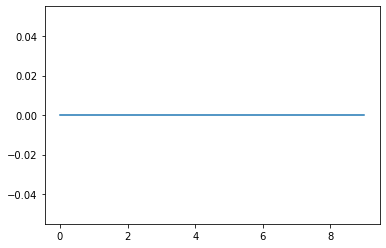

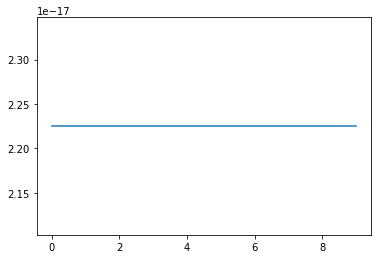

-36.53983724844182


In [13]:
plt.plot(history_herm)
plt.show()

plt.plot(ortho_history)
plt.show()

energy = HFclass.compute_energy()

print(energy)

1.0
-0.004441965353051511


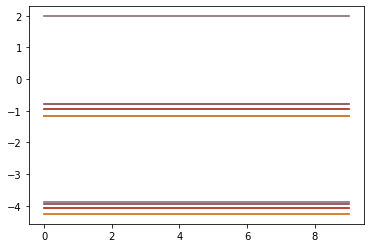

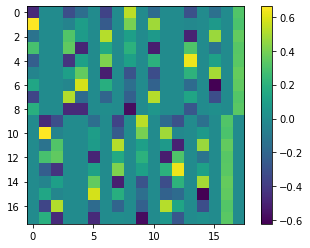

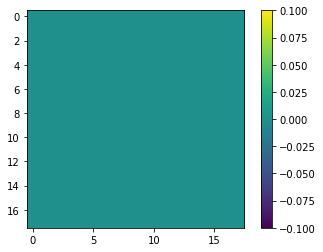

In [14]:
print(np.linalg.norm(HFclass.weights[:, 0]))
print(np.sum(HFclass.weights[0, :].conj() * HFclass.weights[:, 1]))

plt.plot(de)

# plt.semilogy()
# plt.ylim([0,0.001])
plt.show()

plt.imshow(np.real(HFclass.weights))
plt.colorbar()
plt.show()
plt.imshow(np.imag(HFclass.weights))
plt.colorbar()
plt.show()


In [15]:
psi_hf=HFclass.create_hf_psi(FHHamiltonian.basis,nparticles_a=2,nparticles_b=2)
print(psi_hf.conjugate().transpose() @ FHHamiltonian.hamiltonian @ psi_hf)

[0, 1, 9, 10]
-9.16964607533763


In [13]:
# old initialization works better than Hartree Fock
min = 10000
for i, b in enumerate(FHHamiltonian.basis):
    psi = np.zeros(FHHamiltonian.basis.shape[0])
    psi[i] = 1.0
    value = np.conj(psi) @ FHHamiltonian.hamiltonian @ psi
    if value < min:
        min = value
        print(value)
        print(b)
        psi_base = psi

-7.579759093024087
[1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
-7.82396983859143
[0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0]


In [34]:
spinconservation=SpinConservation(size=size_a)
operator_pool:Dict={}

operator_pool=FHHamiltonian.set_operator_pool(operator_pool=operator_pool,conditions=[spinconservation.spin_conservation],nbody='two')
operator_pool=FHHamiltonian.set_operator_pool(operator_pool=operator_pool,conditions=[spinconservation.spin_conservation],nbody='one')
#%%
print('number of operators=',len(list(operator_pool.keys())))
print(operator_pool)
# %%
random=False

model=AdaptVQEFermiHubbard()

model.set_hamiltonian(FHHamiltonian.hamiltonian)
model.set_reference_psi(psi_hf)

model.set_operators_pool(operator_pool=operator_pool,random=random)

#%%


fit=Fit(method='BFGS',tolerance_opt=10**-5,e_ref=egs)

#fit.configuration_checkpoint=configuration
fit.configuration_checkpoint=None
fit.init_model(model)

#%%
history,grad_history=fit.run()
# # %%
print(model.operator_action_info)
print(model.energy-egs/egs)

number of operators= 261
{(0, 0, 0, 0): <1296x1296 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, (0, 1, 0, 1): <1296x1296 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, (0, 2, 0, 2): <1296x1296 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, (0, 3, 0, 3): <1296x1296 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, (0, 4, 0, 4): <1296x1296 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, (0, 5, 0, 5): <1296x1296 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, (0, 6, 0, 6): <1296x1296 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, (0, 7, 0, 7): <1296x1296 sparse matrix of type '<class 'n

KeyboardInterrupt: 

In [13]:
print(model.operator_action_info)

NameError: name 'model' is not defined

In [12]:
rel_error_base = [np.abs((e_min - egs) / egs) for e_min in history]

NameError: name 'history' is not defined

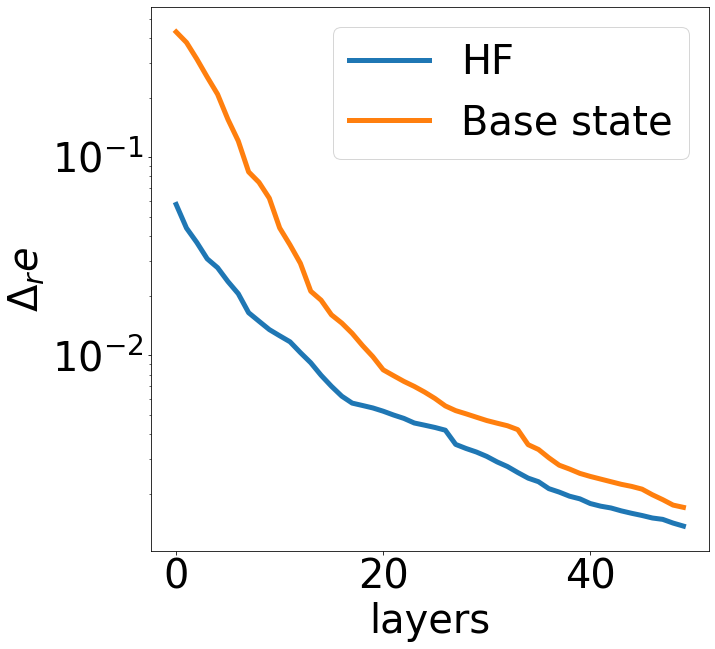

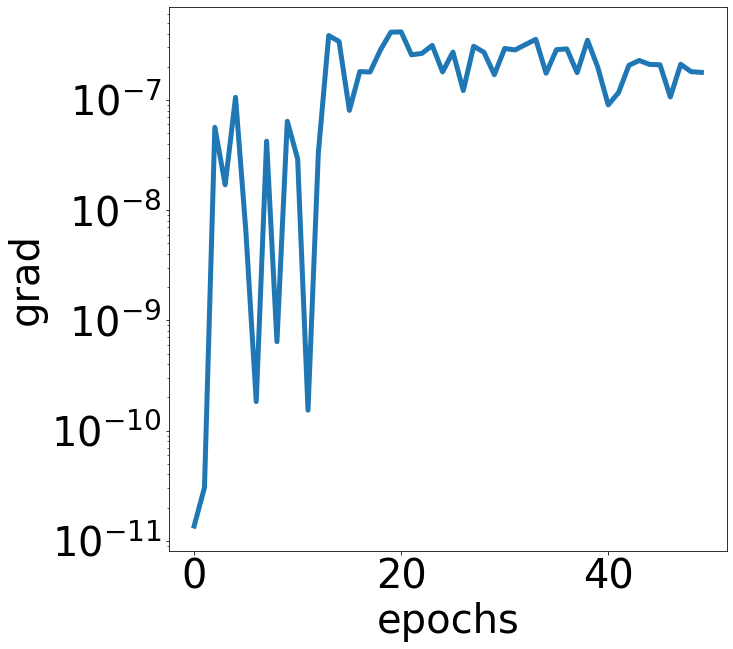

In [16]:
plt.figure(figsize=(10,10))
plt.plot(rel_error_hf,linewidth=5,label='HF')
plt.plot(rel_error_base, linewidth=5, label='Base state')
plt.xlabel('layers',fontsize=40)
plt.legend(fontsize=40)
plt.semilogy()
plt.ylabel(r'$\Delta_r e$',fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize=30)
plt.show()


plt.figure(figsize=(10,10))
plt.plot(grad_history,linewidth=5)
plt.xlabel('epochs',fontsize=40)
plt.semilogy()
plt.ylabel(r'grad',fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize=30)
plt.show()

## Test Hartree Fock for different magnitude of the interaction U

In [1]:
from src.hartree_fock_library import HartreeFock, HartreeFockVariational
from src.hamiltonian_utils import (
    get_twobody_nuclearshell_model,
    FermiHubbardHamiltonian,
    SingleParticleState,
)
import numpy as np
import torch
from typing import Dict, List
from src.qml_models import AdaptVQEFermiHubbard
from src.qml_utils.train import Fit
from src.qml_utils.utils import configuration
import matplotlib.pyplot as plt

In [2]:
egss=[]
e_hf=[]

t_range=tqdm(np.arange(8))
v_ext = np.random.uniform(size=size_a)

for u in t_range:

    size_a = 16
    size_b = 16
    FHHamiltonian = FermiHubbardHamiltonian(
        size_a=size_a, size_b=size_a, nparticles_a=2, nparticles_b=2
    )

    t = -1.0
    

    # define the local onsite potential
    twobody_matrix:Dict={}
    for i in range(size_a):
        twobody_matrix[(i,i+size_a,i+size_a,i)]=u
        twobody_matrix[(i, i + size_a, i, i + size_a)] = -u
        twobody_matrix[( i + size_a,i , i + size_a,i)] = -u
        twobody_matrix[(i+size_a, i , i , i+size_a)] = u

    kinetic_term:Dict={}
    adj_matrix=np.zeros((size_a+size_b,size_a+size_b))
    for i in range(size_a):
        kinetic_term[(i,(i+1) % size_a)]=t
        kinetic_term[((i+1) % size_a,i)]=t
        
        kinetic_term[(size_a +i,size_a+(i+1) % size_a)]=t
        kinetic_term[(size_a+(i+1) % size_a,size_a +i)]=t
        
        
        # adj matrix for HF
        adj_matrix[i,(i+1)%size_a]=t
        adj_matrix[(i + 1) % size_a,i]=t
        adj_matrix[i,i]=-2*t
        adj_matrix[i+size_a,i+size_a]=-2*t
        adj_matrix[i+size_a,size_a+ (i + 1) % size_a] = t
        adj_matrix[size_a+(i + 1) % size_a,size_a+ i] = t

    print(adj_matrix - adj_matrix.T)
    # %%

    FHHamiltonian.get_external_potential(external_potential=np.append(v_ext, v_ext))
    FHHamiltonian.get_kinetic_operator(adj_matrix=kinetic_term)
    FHHamiltonian.get_twobody_interaction(twobody_dict=twobody_matrix)
    FHHamiltonian.get_hamiltonian()

    # print(FHHamiltonian.hamiltonian)
    print(FHHamiltonian.hamiltonian)
    # print(FHHamiltonian.twobody_operator)
    # print(FHHamiltonian.kinetic_operator+FHHamiltonian.twobody_operator-FHHamiltonian.hamiltonian)
    egs, psi0 = FHHamiltonian.get_spectrum(n_states=1)

    print(egs)
    egss.append(egs)

    # %% Hartree fock initialization

    HFclass = HartreeFock(size=size_a, nspecies=2)

    HFclass.get_hamiltonian(
        twobody_interaction=twobody_matrix,
        kinetic_term=adj_matrix,
        external_potential=np.append(v_ext, v_ext),
    )

    de, history_herm, ortho_history = HFclass.selfconsistent_computation(eta=1, epochs=50)

    psi_hf = HFclass.create_hf_psi(FHHamiltonian.basis, nparticles=4)
    print(psi_hf.conjugate().transpose() @ FHHamiltonian.hamiltonian @ psi_hf)

    e_hf.append(psi_hf.conjugate().transpose() @ FHHamiltonian.hamiltonian @ psi_hf)

NameError: name 'tqdm' is not defined

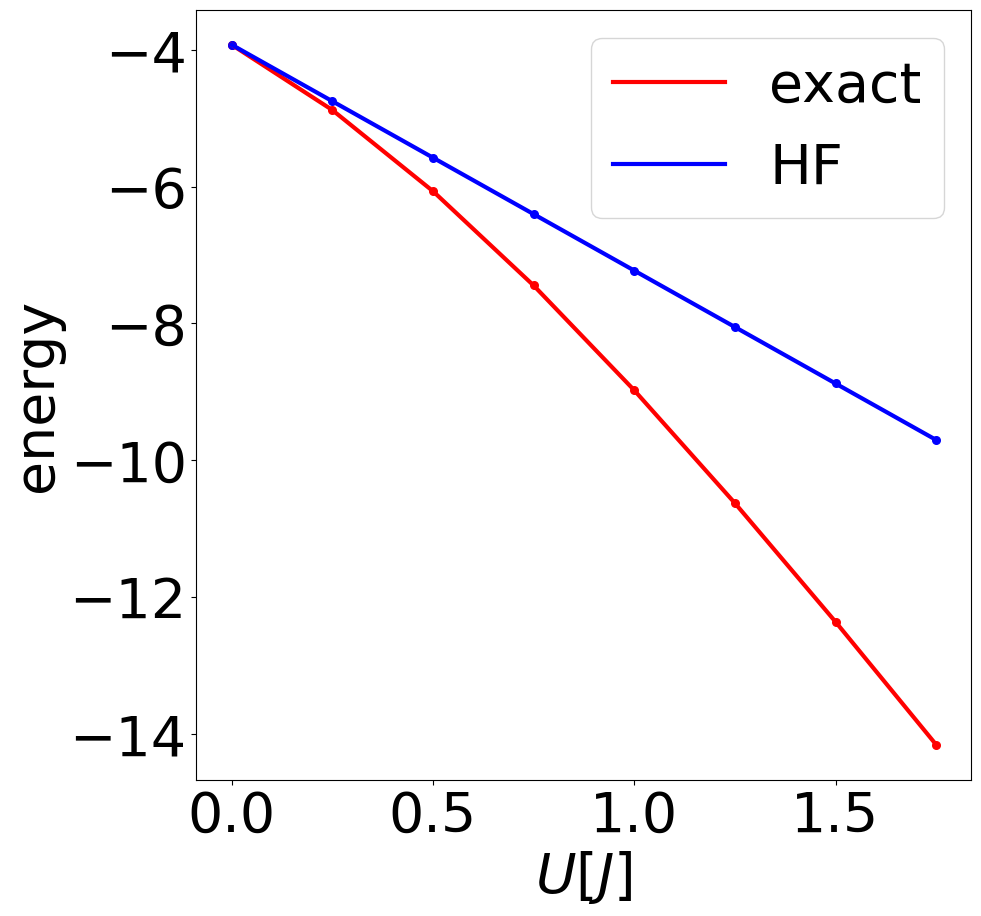

In [22]:
u=np.arange(8)/4
plt.figure(figsize=(10,10))
plt.plot(u,egss,color='red',linewidth=3,label='exact')
plt.scatter(u, egss, color="red", s=30)

plt.plot(u, e_hf, color="blue", linewidth=3,label='HF')
plt.scatter(u, e_hf, color="blue", s=30)
plt.tick_params(which='major',labelsize=40)
plt.xlabel(r'$U [J]$',fontsize=40)
plt.ylabel("energy", fontsize=40)
plt.legend(fontsize=40)
plt.show()